# Hypothesis Testing

Hypothesis testing helps us make decisions about an experiment’s results. <br>
We test whether an observed effect (e.g., difference in means) is statistically significant or due to random chance.

Quick terms:
- Null Hypothesis (H₀): No effect or difference exists.
- Alternative Hypothesis (H₁): There is a significant effect or difference.
    - Example: In an A/B test,
        - H₀: The conversion rate is the same for both groups.
        - H/₁: The conversion rate is different for A vs. B.
- One-Tailed vs. Two-Tailed Tests
    - One-Tailed: Tests for a difference in one direction (e.g., B > A).
    - Two-Tailed: Tests for any difference (e.g., B ≠ A).

## Tests for Normality

#### Shapiro-Wilk Test
- H₀ (Null Hypothesis): Data is normally distributed.
- Best for Small Samples, n < 500
- If p-value < 0.05, reject H₀ → Data is NOT normal

In [88]:
from scipy.stats import shapiro
import numpy as np

np.random.seed(42)
data = np.random.normal(50, 10, 100)  

stat, p = shapiro(data)
print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.3f}")

Shapiro-Wilk Test: Statistic=0.990, p-value=0.655


#### Kolmogorov-Smirnov (KS) Test (For Large Samples)
- Compares data distribution with a normal distribution
- Good for large samples (n > 50)
- If p-value < 0.05, data is not normal

In [90]:
from scipy.stats import kstest

data = np.random.normal(50, 10, 100)

stat, p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"KS Test: Statistic={stat:.3f}, p-value={p:.3f}")


KS Test: Statistic=0.073, p-value=0.629


#### Anderson-Darling Test
- Gives critical values to compare against test statistic; No direct p-value output
- More robust than Shapiro-Wilk.

Compare result.statistic with critical_values at different α levels.

- If statistic < critical value → Fail to reject H₀ (Data is normal).
- If statistic > critical value → Reject H₀ (Data is NOT normal).

In [91]:
from scipy.stats import anderson

data = np.random.normal(50, 10, 100)

result = anderson(data, dist='norm')

print(f"Anderson-Darling Statistic: {result.statistic:.3f}")
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)


Anderson-Darling Statistic: 0.621
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]


#### Q-Q Plot (Quantile-Quantile Plot)

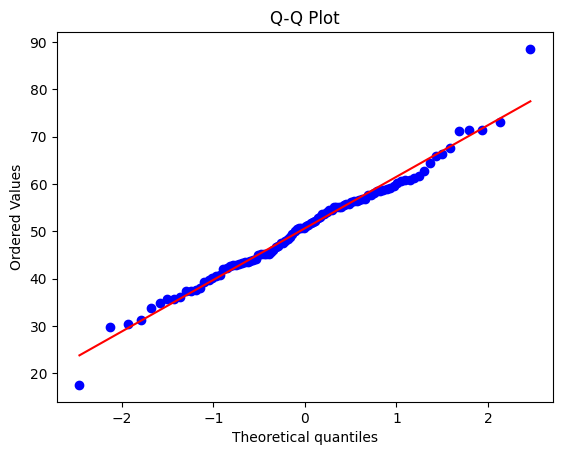

In [92]:
import scipy.stats as stats

data = np.random.normal(50, 10, 100)

stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


## Parametric Tests

#### T-Test (Independent & Paired)
<b>Use case</b>: Compare means between two groups.

Independent T-test: t=-3.489, p=0.001


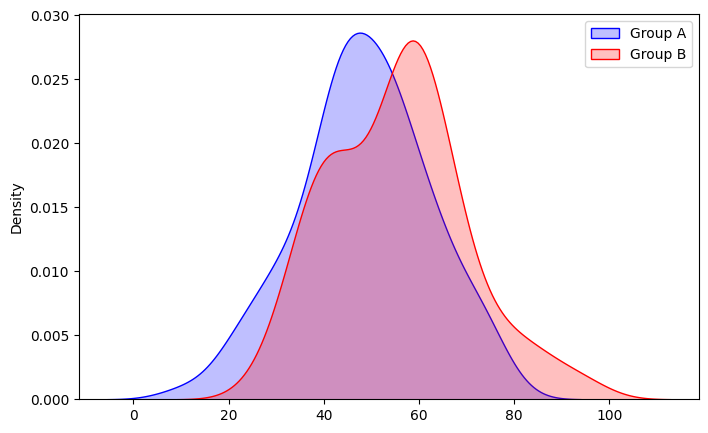

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, ttest_rel

# Independent t-test (two-sample)
# Simulated data
np.random.seed(42)
group_A = np.random.normal(50, 15, 100)
group_B = np.random.normal(55, 15, 100)

t_stat, p_value = ttest_ind(group_A, group_B)
print(f"Independent T-test: t={t_stat:.3f}, p={p_value:.3f}")

# Plot the distributions
plt.figure(figsize=(8, 5))
sns.kdeplot(group_A, label="Group A", fill=True, color="blue")
sns.kdeplot(group_B, label="Group B", fill=True, color="red")
plt.legend()
plt.show()

Paired T-test: t=-20.340, p=0.000


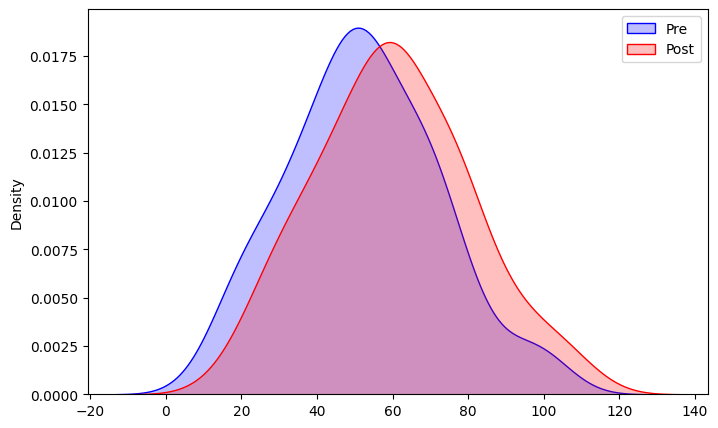

In [46]:
# Paired t-test (e.g., before/after treatment)
pre_treatment = np.random.normal(50, 20, 100)
post_treatment = pre_treatment + np.random.normal(8, 4, 100)  

t_stat, p_value = ttest_rel(pre_treatment, post_treatment)
print(f"Paired T-test: t={t_stat:.3f}, p={p_value:.3f}")

# Plot the distributions
plt.figure(figsize=(8, 5))
sns.kdeplot(pre_treatment, label="Pre", fill=True, color="blue")
sns.kdeplot(post_treatment, label="Post", fill=True, color="red")
plt.legend()
plt.show()

#### ANOVA (Analysis of Variance)
- <b>Use case</b>: Compare means across multiple groups.

In [50]:
from scipy.stats import f_oneway

# Simulated data
group_1 = np.random.normal(50, 15, 100)
group_2 = np.random.normal(55, 15, 100)
group_3 = np.random.normal(60, 15, 100)

# ANOVA test
f_stat, p_value = f_oneway(group_1, group_2, group_3)
print(f"ANOVA: F={f_stat:.3f}, p={p_value:.3f}")


ANOVA: F=15.578, p=0.000


## Non-Parametric Tests

#### Mann-Whitney U Test (Equivalent to 2 sample T Test)
- <b>Use case</b>: Compare medians (useful when data isn’t normally distributed).



Mann-Whitney U Test: U=549594.000, p=0.000


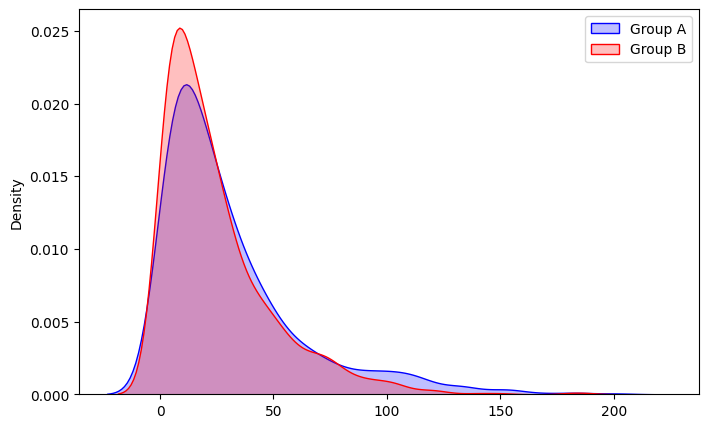

In [67]:
from scipy.stats import mannwhitneyu

# Simulated skewed data
skewed_A = np.random.exponential(30, 1000)
skewed_B = np.random.exponential(25, 1000)

# Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(skewed_A, skewed_B)
print(f"Mann-Whitney U Test: U={u_stat:.3f}, p={p_value:.3f}")

# Plot the distributions
plt.figure(figsize=(8, 5))
sns.kdeplot(skewed_A, label="Group A", fill=True, color="blue")
sns.kdeplot(skewed_B, label="Group B", fill=True, color="red")
plt.legend()
plt.show()

#### Wilcoxon Signed-Rank Test (Equivalent to Paired T Test)
- <b>Use case</b>: Compare paired samples when the normality assumption is violated.

Wilcoxon Test: W=0.000, p=0.000


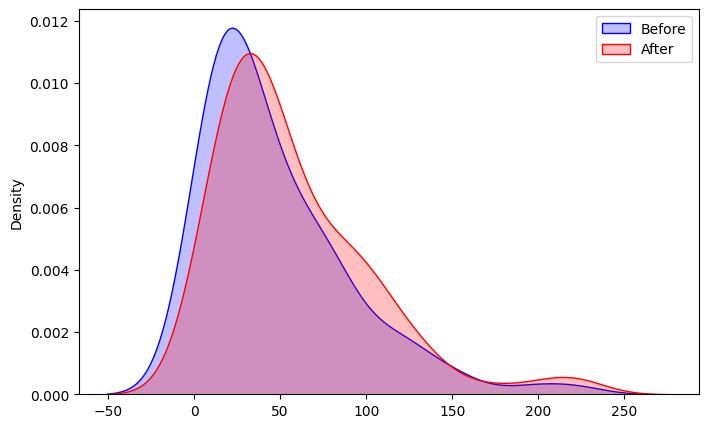

In [82]:
from scipy.stats import wilcoxon

# Simulated before/after data
before = np.random.exponential(50, 100)
after = before + np.random.exponential(10, 100)

# Wilcoxon signed-rank test
w_stat, p_value = wilcoxon(before, after)
print(f"Wilcoxon Test: W={w_stat:.3f}, p={p_value:.3f}")

# Plot the distributions
plt.figure(figsize=(8, 5))
sns.kdeplot(before, label="Before", fill=True, color="blue")
sns.kdeplot(after, label="After", fill=True, color="red")
plt.legend()
plt.show()

## Proportions with Hypothesis Testing
- <b>Use case</b>: Compare conversion rates or revenue between two groups.

In [86]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Simulated conversions
conversions_A = 200
conversions_B = 240
n_A = 1000
n_B = 1000

# Z-test for proportions
stat, p_value = proportions_ztest([conversions_A, conversions_B], [n_A, n_B])
print(f"Proportion Z-test: z={stat:.3f}, p={p_value:.3f}")

Proportion Z-test: z=-2.159, p=0.031


## Multiple Testing & p-value Adjustments

When running multiple tests, adjust for false discovery rate (FDR).

In [87]:
from statsmodels.stats.multitest import multipletests

# Simulated p-values from multiple tests
p_values = np.random.uniform(0, 0.1, 10)

# Apply Bonferroni & FDR correction
_, corrected_p, _, _ = multipletests(p_values, method='fdr_bh')
print(f"Adjusted p-values: {corrected_p}")


Adjusted p-values: [0.04441514 0.04441514 0.08593616 0.04441514 0.04441514 0.06397927
 0.04569624 0.04441514 0.06397927 0.05322524]
